In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [4]:
data <- read_csv("Data/world-data-2023.csv")
data

Rows: 195 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): Country, Abbreviation, Agricultural Land( %), Capital/Major City, ...
dbl  (9): Birth Rate, Calling Code, Fertility Rate, Infant mortality, Life e...
num  (7): Density
(P/Km2), Land Area(Km2), Armed Forces size, Co2-Emissions,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,⋯,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,60,AF,58.10%,652230,323000,32.49,93,Kabul,8672,⋯,78.40%,0.28,38041754,48.90%,9.30%,71.40%,11.12%,9797273,33.93911,67.709953
Albania,105,AL,43.10%,28748,9000,11.78,355,Tirana,4536,⋯,56.90%,1.20,2854191,55.70%,18.60%,36.60%,12.33%,1747593,41.15333,20.168331
Algeria,18,DZ,17.40%,2381741,317000,24.28,213,Algiers,150006,⋯,28.10%,1.72,43053054,41.20%,37.20%,66.10%,11.70%,31510100,28.03389,1.659626
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,56,YE,44.60%,527968,40000,30.45,967,Sanaa,10609,⋯,81.00%,0.31,29161922,38.00%,NA,26.60%,12.91%,10869523,15.55273,48.51639
Zambia,25,ZM,32.10%,752618,16000,36.19,260,Lusaka,5141,⋯,27.50%,1.19,17861030,74.60%,16.20%,15.60%,11.43%,7871713,-13.13390,27.84933
Zimbabwe,38,ZW,41.90%,390757,51000,30.68,263,Harare,10983,⋯,25.80%,0.21,14645468,83.10%,20.70%,31.60%,4.95%,4717305,-19.01544,29.15486


In [11]:
data_cleaned <- rename(data, life_expectancy = "Life expectancy", education_enrollment = "Gross tertiary education enrollment (%)", physicians_per_thousand = "Physicians per thousand", min_wage = "Minimum wage")|>
mutate(education_enrollment = substr(education_enrollment, 1, nchar(education_enrollment)-1)) |>
mutate(education_enrollment = as.double(education_enrollment))|>
mutate(min_wage = substr(min_wage, 2, nchar(min_wage))) |>
mutate(min_wage = as.double(min_wage)) |>
select(min_wage, life_expectancy, physicians_per_thousand, education_enrollment)
data_cleaned

min_wage,life_expectancy,physicians_per_thousand,education_enrollment
<dbl>,<dbl>,<dbl>,<dbl>
0.43,64.5,0.28,9.7
1.12,78.5,1.20,55.0
0.95,76.7,1.72,51.4
⋮,⋮,⋮,⋮
NA,66.1,0.31,10.2
0.24,63.5,1.19,4.1
NA,61.2,0.21,10.0


Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 47 rows containing missing values (`geom_point()`).”


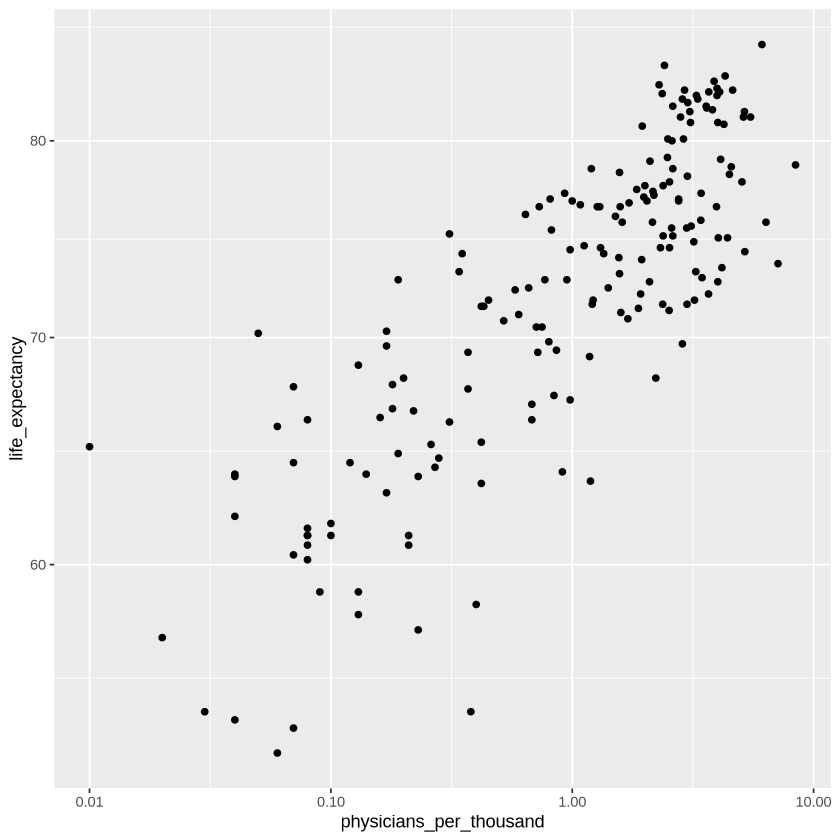

Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


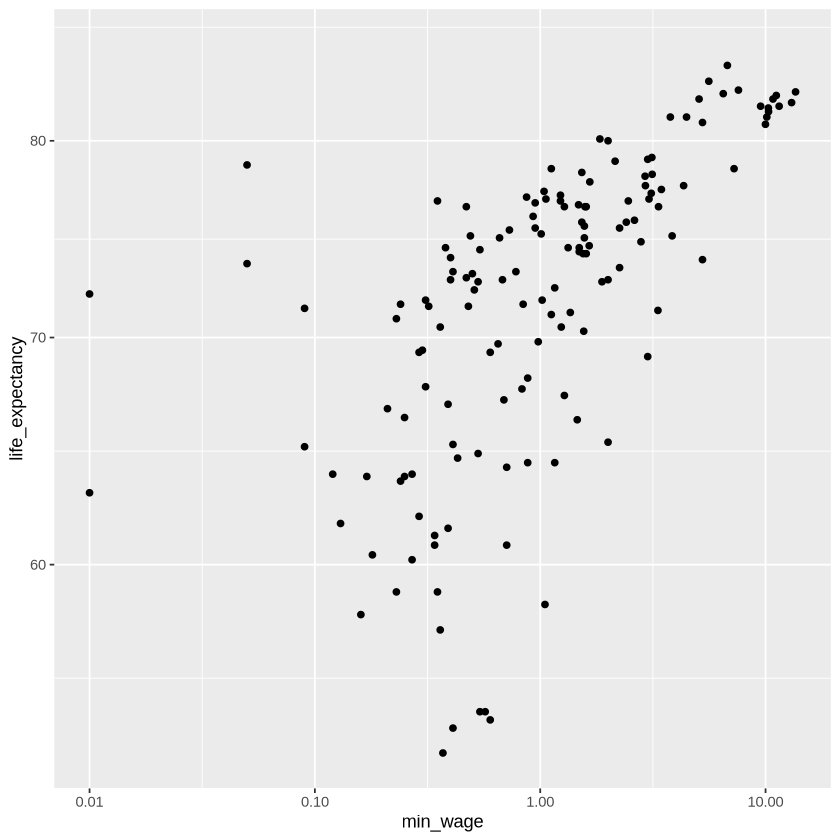

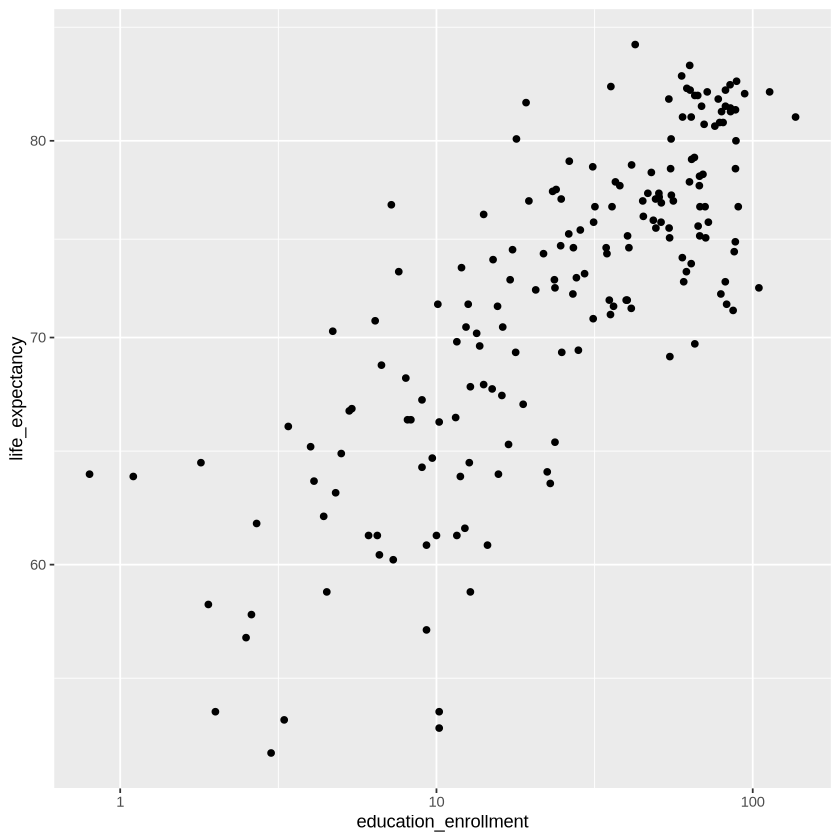

In [13]:
physicians_plot <- ggplot(data_cleaned, aes(x = physicians_per_thousand, y = life_expectancy)) + geom_point() + scale_x_log10() + scale_y_log10()
physicians_plot
min_wage_plot <- ggplot(data_cleaned, aes(x = min_wage, y = life_expectancy)) + geom_point() + scale_x_log10() + scale_y_log10()
min_wage_plot
education_enrollment_plot <- ggplot(data_cleaned, aes(x = education_enrollment, y = life_expectancy)) + geom_point() + scale_x_log10() + scale_y_log10()
education_enrollment_plot